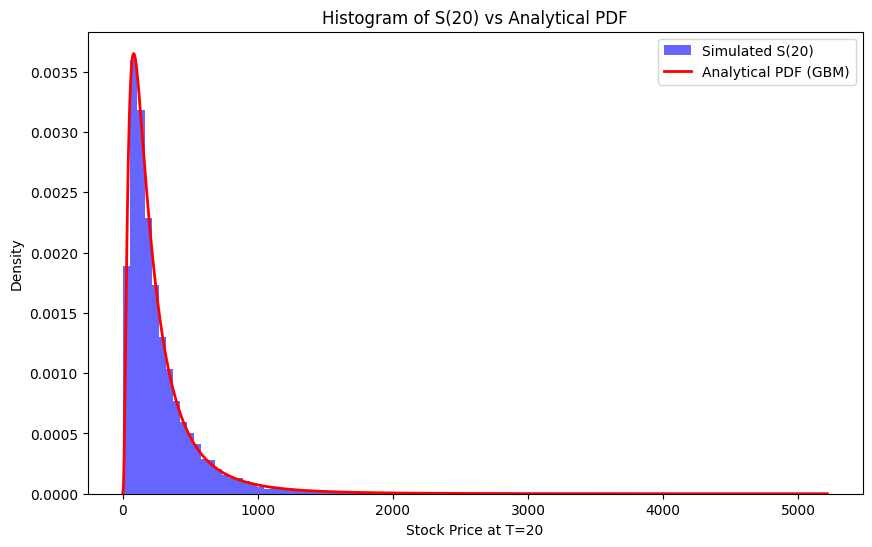

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Parameters
S0 = 100       # Initial stock price
mu = 0.05     # Drift (expected return 0.05)
sigma = 0.2    # Volatility 0.2
T = 20         # Total time
dt = 0.01      # Time step
N_steps = int(T / dt)  # Number of time steps
N_paths = 10000        # Number of paths for histogram

# Simulate stock price paths
S = np.zeros((N_paths, N_steps + 1))
S[:, 0] = S0

# Generate Brownian increments
dB = np.random.normal(0, np.sqrt(dt), size=(N_paths, N_steps))

# Iterate to compute stock prices
for i in range(1, N_steps + 1):
    S[:, i] = S[:, i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dB[:, i-1])

# Extract S(20)
S_T = S[:, -1]

# Histogram of S(20)
plt.figure(figsize=(10, 6))
plt.hist(S_T, bins=100, density=True, alpha=0.6, color='blue', label='Simulated S(20)')

# Analytical PDF of GBM
x = np.linspace(1, np.max(S_T), 1000)
mean_ln = np.log(S0) + (mu - 0.5 * sigma**2) * T
std_ln = sigma * np.sqrt(T)
pdf = lognorm.pdf(x, s=std_ln, scale=np.exp(mean_ln))

# Overlay the analytical PDF
plt.plot(x, pdf, 'r-', lw=2, label='Analytical PDF (GBM)')
plt.title('Histogram of S(20) vs Analytical PDF')
plt.xlabel('Stock Price at T=20')
plt.ylabel('Density')
plt.legend()
plt.show()


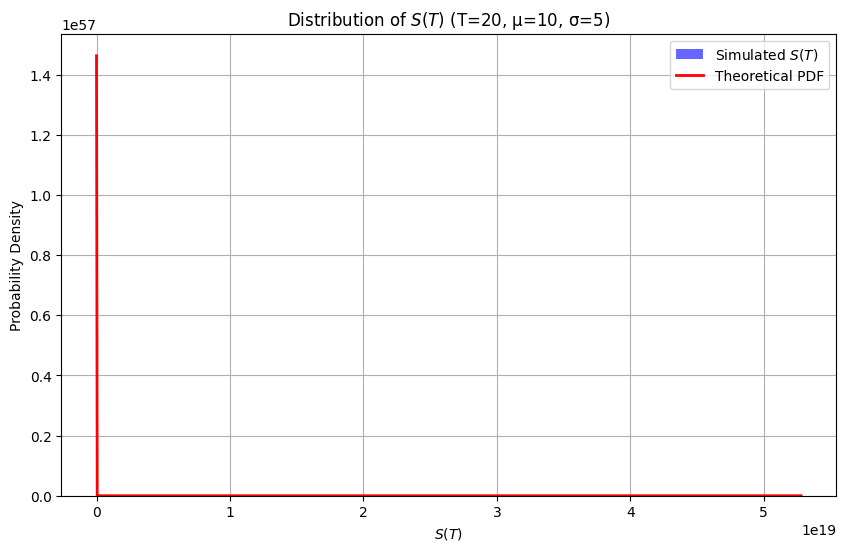

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Parameters
S0 = 100        # Initial stock price
mu = 10         # Drift
sigma = 5       # Volatility
T = 20          # Time horizon
N = 1000        # Number of time steps
M = 100000      # Number of simulations

# Time discretization
dt = T / N

# Simulate Geometric Brownian Motion
S = np.zeros((M, N + 1))
S[:, 0] = S0

for t in range(1, N + 1):
    dB = np.random.normal(0, np.sqrt(dt), size=M)
    S[:, t] = S[:, t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dB)

# Final values at time T
S_T = S[:, -1]

# Analytical PDF of GBM at T
mean_ln = np.log(S0) + (mu - 0.5 * sigma**2) * T
std_ln = sigma * np.sqrt(T)
x = np.linspace(min(S_T), max(S_T), 1000)
theoretical_pdf = lognorm.pdf(x, s=std_ln, scale=np.exp(mean_ln))

# Plotting the histogram and theoretical PDF
plt.figure(figsize=(10, 6))
plt.hist(S_T, bins=100, density=True, alpha=0.6, color='blue', label='Simulated $S(T)$')
plt.plot(x, theoretical_pdf, 'r-', lw=2, label='Theoretical PDF')
plt.xlabel('$S(T)$')
plt.ylabel('Probability Density')
plt.title(f'Distribution of $S(T)$ (T={T}, μ={mu}, σ={sigma})')
plt.legend()
plt.grid()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


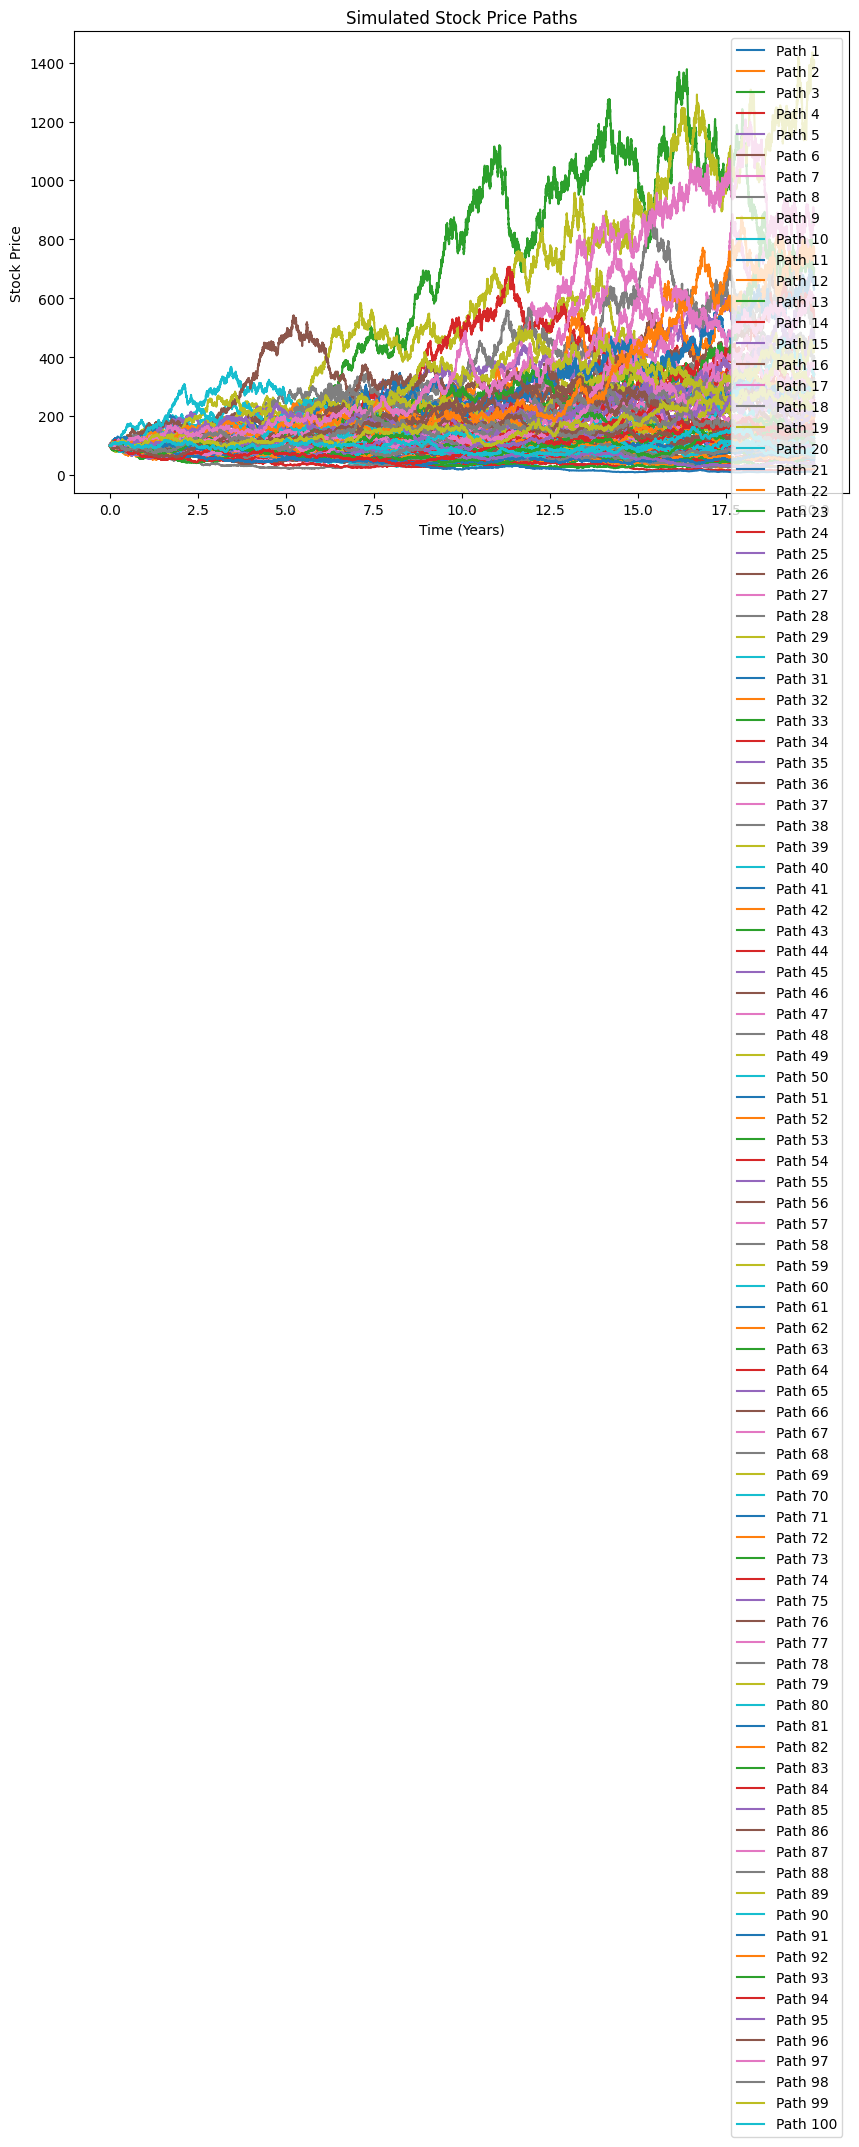

Path 1: S(20) = 58.30
Path 2: S(20) = 84.65
Path 3: S(20) = 110.12
Path 4: S(20) = 341.27
Path 5: S(20) = 654.63
Path 6: S(20) = 495.06
Path 7: S(20) = 163.17
Path 8: S(20) = 36.03
Path 9: S(20) = 435.44
Path 10: S(20) = 103.85
Path 11: S(20) = 297.30
Path 12: S(20) = 316.02
Path 13: S(20) = 874.82
Path 14: S(20) = 256.35
Path 15: S(20) = 44.31
Path 16: S(20) = 327.26
Path 17: S(20) = 139.14
Path 18: S(20) = 88.52
Path 19: S(20) = 1401.49
Path 20: S(20) = 90.40
Path 21: S(20) = 170.87
Path 22: S(20) = 208.95
Path 23: S(20) = 137.79
Path 24: S(20) = 51.50
Path 25: S(20) = 285.13
Path 26: S(20) = 113.78
Path 27: S(20) = 847.99
Path 28: S(20) = 590.34
Path 29: S(20) = 134.46
Path 30: S(20) = 84.37
Path 31: S(20) = 199.98
Path 32: S(20) = 33.85
Path 33: S(20) = 57.16
Path 34: S(20) = 445.89
Path 35: S(20) = 296.02
Path 36: S(20) = 140.78
Path 37: S(20) = 676.74
Path 38: S(20) = 476.56
Path 39: S(20) = 137.25
Path 40: S(20) = 114.82
Path 41: S(20) = 51.14
Path 42: S(20) = 746.63
Path 43: S(

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100       # Initial stock price
mu = 0.05      # Drift (expected return)
sigma = 0.2    # Volatility
T = 20         # Total time
dt = 0.001     # Time step (smaller for numerical stability)
N_steps = int(T / dt)  # Number of time steps
N_paths = 100            # Number of paths for visualization

# Simulate stock price paths
S = np.zeros((N_paths, N_steps + 1))
S[:, 0] = S0

# Generate Brownian increments
dB = np.random.normal(0, np.sqrt(dt), size=(N_paths, N_steps))

# Iterate to compute stock prices
for i in range(1, N_steps + 1):
    S[:, i] = S[:, i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dB[:, i-1])

# Extract S(20)
S_T = S[:, -1]

# Plot paths
plt.figure(figsize=(10, 6))
time = np.linspace(0, T, N_steps + 1)
for i in range(N_paths):
    plt.plot(time, S[i, :], label=f'Path {i+1}')
plt.title('Simulated Stock Price Paths')
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Display S(20) values
for i, final_price in enumerate(S_T):
    print(f"Path {i+1}: S(20) = {final_price:.2f}")


Simulated paths: 10000
Average payoff: 642.18
Call option price at time t=0: 236.24


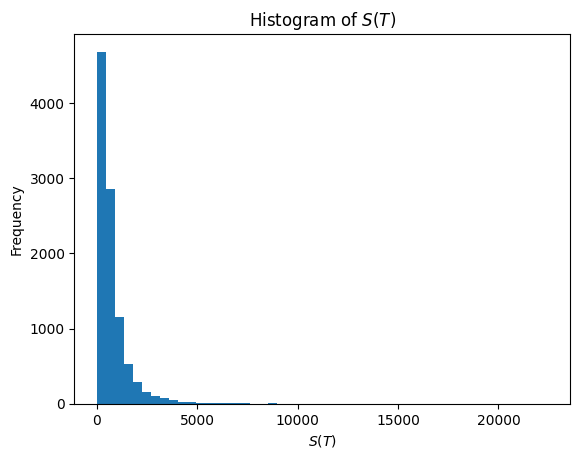

In [31]:
# Adjusted Parameters
mu = 0.1          # Drift (10% annually)
sigma = 0.2       # Volatility (20% annually)
r = 0.05          # Interest rate (5% annually)
S_0 = 100         # Initial stock price
T = 20            # Time to maturity in years
M = 10000         # Number of simulations

# Simulate S(T)
dt = 0.01
N = int(T / dt)
S = np.zeros((M, N + 1))
S[:, 0] = S_0
for t in range(1, N + 1):
    dW = np.random.normal(0, np.sqrt(dt), size=M)
    S[:, t] = S[:, t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)

S_T = S[:, -1]

# Call Option Pricing
payoffs = np.maximum(S_T - strike_price, 0)
average_payoff = np.mean(payoffs)
call_price = np.exp(-r * T) * average_payoff

# Outputs
print(f"Simulated paths: {M}")
print(f"Average payoff: {average_payoff:.2f}")
print(f"Call option price at time t=0: {call_price:.2f}")

# Check S(T) Distribution
plt.hist(S_T, bins=50)
plt.title("Histogram of $S(T)$")
plt.xlabel("$S(T)$")
plt.ylabel("Frequency")
plt.show()
